In [1]:
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow import keras



In [3]:
unseen_data = pd.read_json("../dataset/Sarcasm_Headlines_Dataset.json", lines=True)
unseen_data.head(3)
unseen_data =unseen_data.sample(n=9000)

In [4]:
unseen_data = unseen_data.drop(columns=["article_link"])

In [5]:
data = pd.read_csv("../datasets/final_Set.csv")

In [6]:
data = data.drop(columns=["Unnamed: 0"])

In [7]:
data = data.sample(n=25000)

In [8]:
data["text"] = data["parent_comment"] + " " + data["comment"]

In [9]:
data = data.drop(columns=["parent_comment", "comment"])

In [10]:
vectorizer = TfidfVectorizer()

vectorized_data = vectorizer.fit_transform(data["text"])

In [11]:
vectorized_test_data = vectorizer.transform(unseen_data["headline"])

In [12]:
y_true_headlines = unseen_data["is_sarcastic"]


In [13]:
model = LogisticRegression(max_iter=1000)

In [14]:
model.fit(vectorized_data, data["label"])

LogisticRegression(max_iter=1000)

In [15]:
y_test_pred = model.predict(vectorized_test_data)


In [17]:
print(classification_report(y_true_headlines, y_test_pred))

              precision    recall  f1-score   support

           0       0.53      0.57      0.55      5075
           1       0.38      0.33      0.35      3925

    accuracy                           0.47      9000
   macro avg       0.45      0.45      0.45      9000
weighted avg       0.46      0.47      0.46      9000



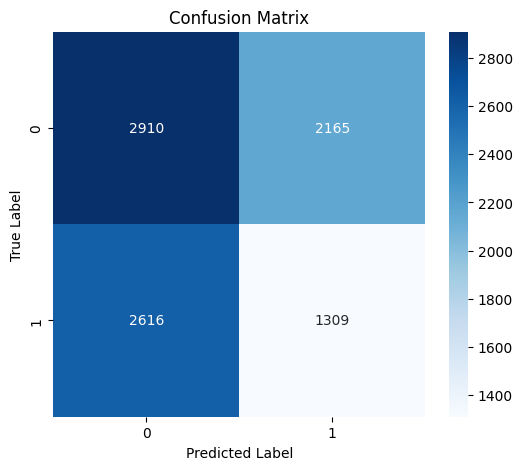

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_confusion_matrix(y_true, y_pred, classes, title='Confusion Matrix', cmap='Blues'):
   
    # Compute confusion matrix
    matrix = confusion_matrix(y_true, y_pred, labels=classes)
    
    plt.figure(figsize=(6, 5))
    sns.heatmap(matrix, annot=True, fmt='d', cmap=cmap, 
                xticklabels=classes, 
                yticklabels=classes)
    
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

plot_confusion_matrix(y_true_headlines, y_test_pred, [0, 1])
